In [1]:
import arff
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as pt
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
def LoadData(name):
    originalData = arff.load(open(name))
    return originalData

In [3]:
def extractAttribute(extData):
    attributesTuple = extData.get("attributes",[])
    attributeList=[a[0] for a in attributesTuple]
    return attributeList,attributesTuple

In [4]:
def extractData(extdata,attributeList):
    data=extdata.get("data")
    dataset = pd.DataFrame(data,columns=attributeList)
    return dataset

In [5]:
def getExtraColumn(noOfRecord,attributeList,dataset):
    dropColm = list() 
    for i in attributeList:
        if(dataset[i].count() < noOfRecord/2):
            dropColm.append(i);
        else:    
            distinctvalues = dataset[i].value_counts()
            distinctvalues = distinctvalues.sort_values()
            if(distinctvalues.index[-1] == 'NULL' and distinctvalues[-1] > noOfRecord/2  ):
                dropColm.append(i);
    return dropColm

In [6]:
def getFinalList(dropColumn,attributeList,attributesTuple):
    updatedList = [i for i in attributeList if i not in dropColumn]
    updatedValues = [i for i in attributesTuple if i[0] not in dropColumn]
    for i in range(len(updatedList)):
        updatedValues[i][1].append('FillNone') 
    return updatedList,updatedValues

In [7]:
def dealWithMissingvalue(dropColumn,dataset):
    dataset = dataset.drop(dropColumn, axis = 1)
    dataset= dataset.replace(to_replace = [None,'NULL'], value = 'FillNone')
    return dataset

In [8]:
def EncodeValues(attributeList,updatedValues,dataset):
    listOfNominalAttribute=['Session First Request Day of Week','Session Last Request Day Of Week','Assortment Level 2 Path Last'
                        ,'Content Level 2 Path Last','Session Browser Family Top 3',
                       'Session First Template Top 5','Session Last Template Top 5','Session First Referrer Top 5']
    for i in range(len(attributeList)):
        if (attributeList[i] not in listOfNominalAttribute):
            dataset[attributeList[i]] = dataset[attributeList[i]].apply(lambda x : updatedValues[i][1].index(x))
    for i in listOfNominalAttribute:
        dataset = pd.get_dummies(dataset[i],prefix=i.replace(" ", "")).join(dataset)
    dataset = dataset.drop(listOfNominalAttribute,axis =1)
    return dataset

In [9]:
trainingName='training_subsetD.arff'
testingName='testingD.arff' 
#Load Data 
trainingData = LoadData(trainingName)
testingData = LoadData(testingName)

In [66]:
#XYZ=testingData.get("data")
#DFXYZ = pd.DataFrame(XYZ)
#DFXYZ.iloc[:,-1].value_counts()

False    18708
True      6292
Name: 274, dtype: int64

In [10]:
attributeList,attributesTuple = extractAttribute(trainingData)
dataset = extractData(trainingData,attributeList)
datasetTesting = extractData(testingData,attributeList)  

In [11]:
dropColumn = getExtraColumn(len(dataset),attributeList,dataset)
dropColumn.extend(['Num Pin Dot Pattern Views','Session Browser Family'])

In [12]:
attributeList,updatedVlaues = getFinalList(dropColumn,attributeList,attributesTuple)
dataset = dealWithMissingvalue(dropColumn,dataset)
datasetTesting = dealWithMissingvalue(dropColumn,datasetTesting)

In [13]:
dataset = EncodeValues(attributeList,updatedVlaues,dataset)
datasetTesting = EncodeValues(attributeList,updatedVlaues,datasetTesting)

In [14]:
for i in range(len(attributeList)):
    print("attributeList",attributeList[i])
    print("updatedValues",updatedVlaues[i])
#a1= 'Session Request Count'
#dataset[a1].value_counts()    

attributeList Session Cookie ID
updatedValues ('Session Cookie ID', ["'(-inf-187131.5]'", "'(187131.5-425048]'", "'(425048-662136.5]'", "'(662136.5-883316]'", "'(883316-inf)'", 'FillNone'])
attributeList Session ID
updatedValues ('Session ID', ["'(-inf-82045]'", "'(82045-164065]'", "'(164065-247691]'", "'(247691-322370]'", "'(322370-inf)'", 'FillNone'])
attributeList Session Visit Count
updatedValues ('Session Visit Count', ["'(-inf-1.5]'", "'(1.5-2.5]'", "'(2.5-4.5]'", "'(4.5-26.5]'", "'(26.5-inf)'", 'FillNone'])
attributeList Session First Processing Time
updatedValues ('Session First Processing Time', ["'(-inf-54.5]'", "'(54.5-62.5]'", "'(62.5-70.5]'", "'(70.5-179.5]'", "'(179.5-inf)'", 'FillNone'])
attributeList Session First Content ID
updatedValues ('Session First Content ID', ["'(-inf-1351]'", "'(1351-1391]'", "'(1391-8354]'", "'(8354-11574]'", "'(11574-inf)'", 'FillNone'])
attributeList Session First Request Day of Week
updatedValues ('Session First Request Day of Week', ['Mond

In [15]:
a1= 'Class'
dataset[a1].value_counts()
#attributeList[-1]
#dataset[]

1    32193
0     7807
Name: Class, dtype: int64

In [16]:
def SeperateOutput (dataset):
    outputCol = 'Class'
    Y = dataset[outputCol]
    dataset = dataset.drop(outputCol, axis = 1)
    return dataset,Y

In [17]:
def handleMissingCol(dataset,dataSetTest):
    trainingColumn = dataset.columns
    testingColumn = dataSetTest.columns
    missingCol = (list(set(trainingColumn) - set(testingColumn)))
    for c in missingCol:
        dataSetTest[c] = 0
    dataSetTest = dataSetTest[trainingColumn]
    return dataSetTest
    #for i in updatedList: 
    #s = updatedDataset[i].value_counts()
    #if('NULL' in s.index ):
    #   print(i)

In [18]:
dataset,Y = SeperateOutput(dataset)

In [19]:
dataSetTest,yTest = SeperateOutput(datasetTesting)

In [20]:
dataSetTest = handleMissingCol(dataset,dataSetTest)

In [48]:
dataset=(dataset-dataset.mean())/dataset.std()
dataSetTest=(dataSetTest-dataSetTest.mean())/dataSetTest.std()

In [21]:
def plot(iteration,accuracy,accuracyTest):
    pt.figure(figsize = (5,5))
    pt.plot(iteration,accuracy,label = "Training")
    pt.plot(iteration,accuracyTest,label = "Testing")
    #pt.xticks(np.arange(1, 20, step=1))
    pt.xlabel('iteration')
    pt.ylabel("accuracy")
    pt.legend()
    pt.show()

In [22]:
def accuracy(ypredict,yoriginal):
    diff = ypredict == yoriginal
    return np.sum(diff)/len(ypredict)

In [50]:
dataSetTest['Session ID'] = 0
dataSetTest['Num Wax Product Views'] = 0
dataSetTest['ContentLevel2PathLast_/Content/templates/include'] = 0
dataSetTest['AssortmentLevel2PathLast_/Assortments/Main/Seasonal'] = 0
for i in dataSetTest.columns:
    xy = dataSetTest[i].count()
    if (xy < 25000):
        print (i)
#print(dataSetTest['Num Wax Product Views'])

In [24]:
iteration = []
accuracyTrain = []
accuracyTest = []
for i in range(5,20):
    kf = KFold(n_splits=5)
    foldAccuracy = []
    modelList =[]
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth = i)
    for train_index, test_index in kf.split(dataset):
        #print("TRAIN:", train_index, "TEST:", test_index)
        datasetTrain, datasetValidate = dataset.iloc[train_index], dataset.iloc[test_index]
        yTrain, yValidate = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(datasetTrain,yTrain)
        foldAccuracy.append(model.score(datasetValidate,yValidate))
        modelList.append(model)
    #print('depth ',i)
    #print('foldAccuract',foldAccuracy)
    iteration.append(i)
    modelPos = np.argmax(foldAccuracy)
    accuracyTrain.append(np.mean(foldAccuracy))
    prediction = modelList[modelPos].predict(dataSetTest)
    #prediction = modelList[modelPos].score(dataSetTest,yTest)
    #accuracyTest.append(prediction)
    #print(prediction)
    accuracyTest.append(accuracy(prediction,yTest))
#plot(iteration,accuracyTrain)
print(iteration)
print(accuracyTrain)
print(accuracyTest)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.803275, 0.802425, 0.798825, 0.795825, 0.7365999999999999, 0.7367250000000001, 0.7347, 0.7270749999999999, 0.723, 0.7221, 0.72, 0.7147249999999999, 0.709, 0.70325, 0.69665]
[0.74836, 0.74536, 0.74552, 0.74316, 0.7372, 0.73264, 0.733, 0.71596, 0.72212, 0.7156, 0.70804, 0.69708, 0.69644, 0.69376, 0.69504]


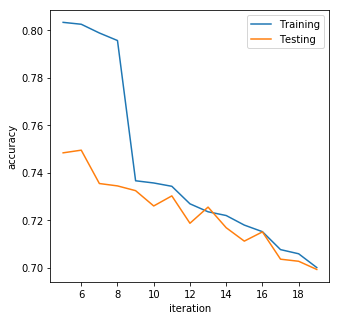

In [164]:
plot(iteration,accuracyTrain,accuracyTest)

In [51]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [79]:
principalDfsmall = principalDf.iloc[0:10]
principalDfsmall.shape

(10, 2)

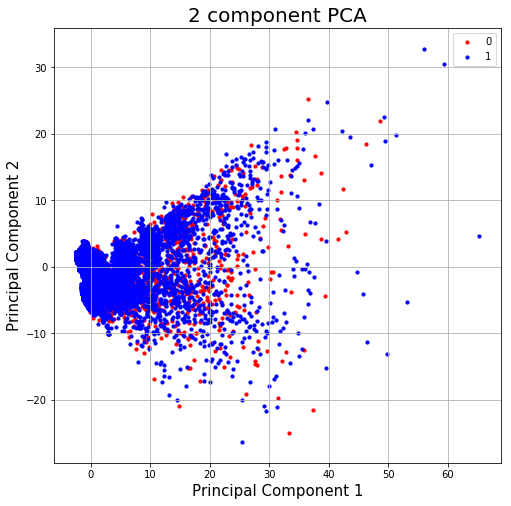

In [52]:
fig = pt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = Y[:] == target
    #print(indicesToKeep)
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()    
# pt.figure(figsize = (5,5))
# pt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1],Y, cmap='Paired_r')
# pt.xlabel('principal component 1')
# pt.ylabel('principal component 2')
# pt.legend()
# pt.show()

# Now Training For PCA Decision Tree

In [62]:
finalDf = pd.concat([principalDf, Y], axis = 1)

In [84]:
finalDf = pd.concat([principalDfsmall, Y[0:10]], axis = 1)

In [85]:
finalDf

,principal component 1,principal component 2,Class
0,0.388527,-1.691366,1
1,36.047291,5.006160,0
2,23.030074,4.702673,1
3,2.224411,-5.291511,0
4,32.355831,5.347708,1
5,-1.427067,0.645331,1
6,-1.430191,0.626512,1
7,11.419924,-5.732443,0
8,-1.365545,0.481287,1
9,1.271961,-4.314669,0


In [189]:
# Now trying to resample the data so that all our class are equally balanced
principalDf.shape
Y.shape
#finalDf = pd.concat([principalDf, Y], axis = 1)
count1,count0 = finalDf.iloc[:,2].value_counts()

In [196]:
# Trying to under sample
df_class_0 = finalDf[finalDf['Class'] == 0]
df_class_1 = finalDf[finalDf['Class'] == 1]

In [199]:
print(df_class_0.shape)
print(df_class_1.shape)
count0

(7807, 3)
(32193, 3)


7807

In [200]:
df_class_1_under = df_class_1.sample(count0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

In [234]:
df_class_0_over = df_class_0.sample(count1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)
df_test_over.shape

(64386, 3)

In [86]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =6)
#model.fit(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
#model.fit(df_test_over.iloc[:,0:2],df_test_over.iloc[:,2])
model.fit(finalDf.iloc[:,0:2],finalDf.iloc[:,2])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
#model.score(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
model.score(finalDf.iloc[:,0:2],finalDf.iloc[:,2])

1.0

In [65]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = .02
    x_min, x_max = X.iloc[:,0].min() - 10*h, X.iloc[:,0].max() + 10*h
    y_min, y_max = X.iloc[:,1].min() - 10*h, X.iloc[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    ##print(xx)
    #print(yy)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pt.figure(figsize=(8,8))
    pt.contourf(xx, yy, Z,cmap=cmap,  alpha=0.25) 
    pt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    pt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y); #, edgecolors='k'

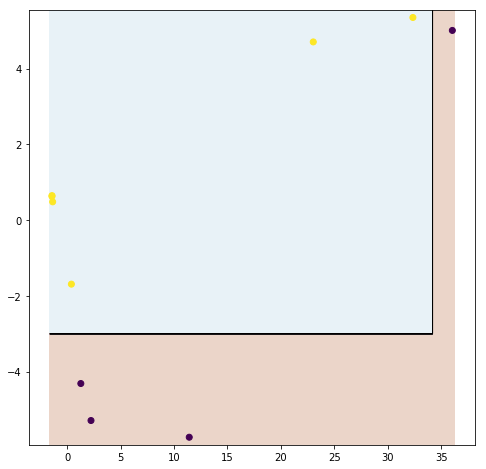

In [88]:
#plot_decision_boundary(model,df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
#plot_decision_boundary(model,df_test_over.iloc[:,0:2],df_test_over.iloc[:,2])
plot_decision_boundary(model,finalDf.iloc[:,0:2],finalDf.iloc[:,2])

In [206]:
df_test_under.iloc[:,2].value_counts()

1    7807
0    7807
Name: Class, dtype: int64

In [89]:
model1 = KNeighborsClassifier(n_neighbors=5)
#model1.fit(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
model1.fit(finalDf.iloc[:,0:2],finalDf.iloc[:,2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
#model1.score(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
model1.score(finalDf.iloc[:,0:2],finalDf.iloc[:,2])


0.6

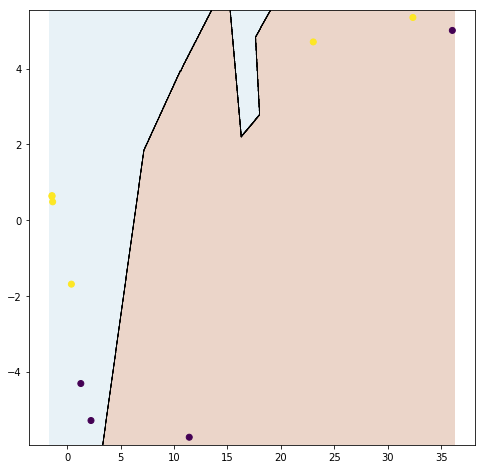

In [91]:
#plot_decision_boundary(model1,df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
plot_decision_boundary(model1,finalDf.iloc[:,0:2],finalDf.iloc[:,2])


In [92]:
gnb = GaussianNB()
#gnb.fit(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
gnb.fit(finalDf.iloc[:,0:2],finalDf.iloc[:,2])

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
#gnb.score(df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
gnb.score(finalDf.iloc[:,0:2],finalDf.iloc[:,2])


0.9

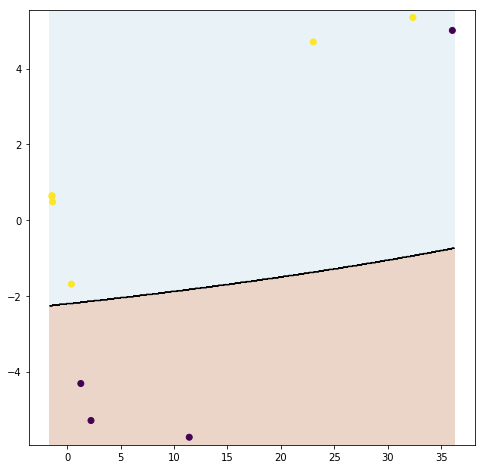

In [94]:
#plot_decision_boundary(gnb,df_test_under.iloc[:,0:2],df_test_under.iloc[:,2])
plot_decision_boundary(gnb,finalDf.iloc[:,0:2],finalDf.iloc[:,2])